# <font style="color:darkblue;font-size:48px">**# Kaggle Datasets for Fraud Detection using Advanced Data Analytics Technique**</font>

<br/>
<font style="color:green;font-size:20px">For my data analysis, I have used logistic regression(one of the machine learning technique) for this classification modeling since the datasets is going to predict a binary outcome whether the test data is fraudulent or not. Additionally, we will try to benchmark the model performance with other classification technique and select the best possible model.</font>
<br/>
<br/>
<font style="color:green;font-size:20px">The tools that I used in this project are Jupyter Notebook, Numpy, Pandas, Matplotlib, Seaborn and Scikit-learn.</font>

<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:#8B8000;font-size:14px"><b>The synthetic data is obtained from Kaggle datasets and contributed by Edgar Lopez-Rojas. It is available for use and licensed under CC BY-SA 4.0.</b></font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:#8B8000;font-size:14px"><b>This is an open-source project. Please just give a proper citation in your use.</b></font>
<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

print(pd)
print(sns)

<module 'pandas' from '/Users/ericthan/PycharmProjects/pythonProject/test1/lib/python3.8/site-packages/pandas/__init__.py'>
<module 'seaborn' from '/Users/ericthan/PycharmProjects/pythonProject/test1/lib/python3.8/site-packages/seaborn/__init__.py'>


<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Exploratory Data Analysis & Visualisation</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>

In [3]:
df = pd.read_csv('/Users/ericthan/Desktop//DataAnalysis_Numpy/Showcase_Jupyter/CreditCard_Fraud.csv', low_memory=False)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


[Text(0.5, 23.52222222222222, 'data attributes'),
 Text(50.722222222222214, 0.5, 'row')]

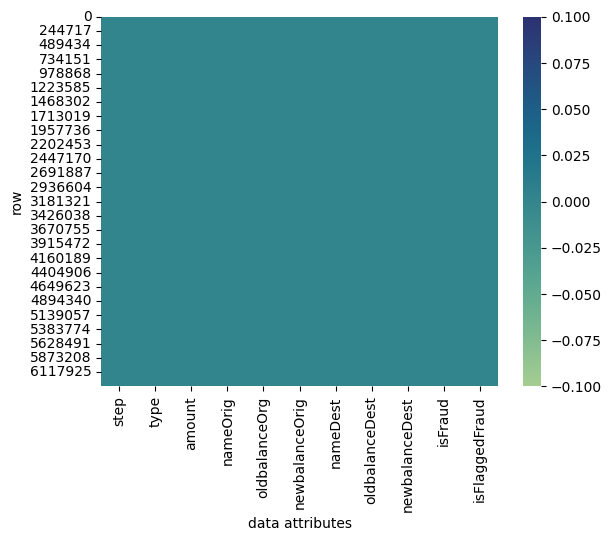

In [6]:

ax = sns.heatmap(df.isnull(), cmap="crest")
ax.set(xlabel="data attributes", ylabel="row")

# As shown in heatmap below, data is free from null values.

In [7]:
df.isnull().sum()

# There is no null value in any data attributes

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Text(0.5, 1.0, 'Fradulent transactions by different types')

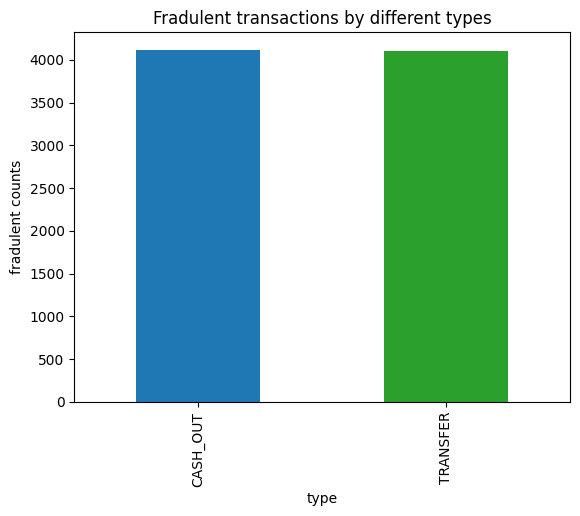

In [7]:

df22 = df.loc[ df['isFraud'] == 1 ]
bar_colors = ['tab:blue', 'tab:green']

bax = pd.value_counts(df22['type']).plot.bar(color=bar_colors)
bax.set_xlabel("type")
bax.set_ylabel("fradulent counts")
bax.set_title('Fradulent transactions by different types')

# There are 2 types of transaction when the transactions are fraudulent cases.

Text(0.5, 1.0, 'Different transaction types by 1.0=Fraud and 0.0=No Fraud')

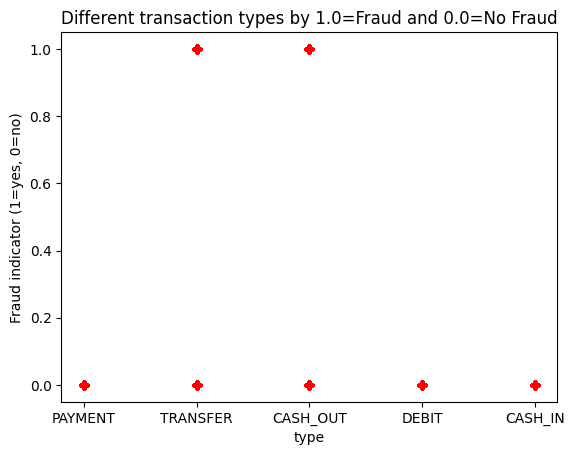

In [8]:

fig, sca = plt.subplots()

sca.scatter(df.type, df.isFraud, marker = 'P', color='red')
sca.set_xlabel("type")
sca.set_ylabel("Fraud indicator (1=yes, 0=no)")
sca.set_title('Different transaction types by 1.0=Fraud and 0.0=No Fraud')


# The 2 types of transactions are related to fradulent cases. Otherwise, 
# there are 5 common types of transactions in the datasets.

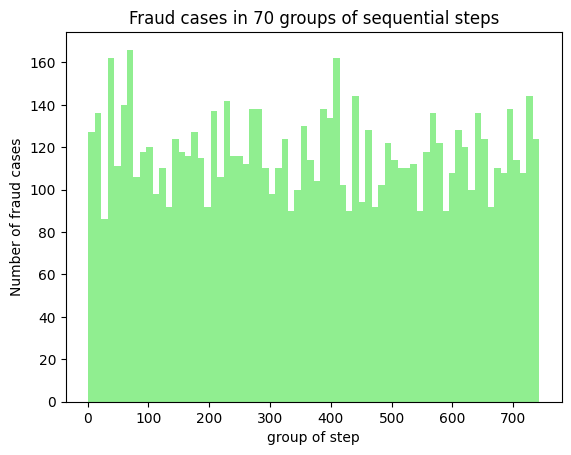

In [12]:

plt.hist(df22['step'], bins=70, color='lightgreen')
plt.xlabel("group of step")
plt.ylabel("Number of fraud cases")
plt.title('Fraud cases in 70 groups of sequential steps')
plt.show()

# The below data suggests that fraud cases are scattered across any step between 0 - 743
# Fraud case can happen at any step.

In [13]:
df.loc[ df['isFraud'] == 1 ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


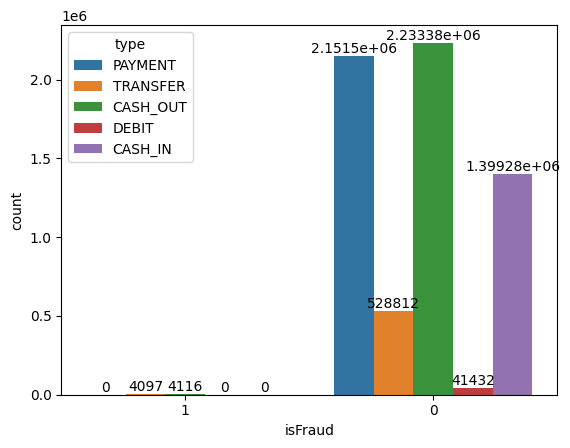

In [14]:
#sns.countplot(x='isFraud', hue='type', data=df1)

ax = sns.countplot(x=df['isFraud'], hue='type', data=df, order=df['isFraud'].value_counts(ascending=True).index);
for label in ax.containers:
    ax.bar_label(label)
plt.show()


# The data below show the number of transactions for actual fraudulent cases are
# significantly small as opposed to transactions on non-fraudulent cases.

[Text(0.5, 1.0, 'Fraud cases types')]

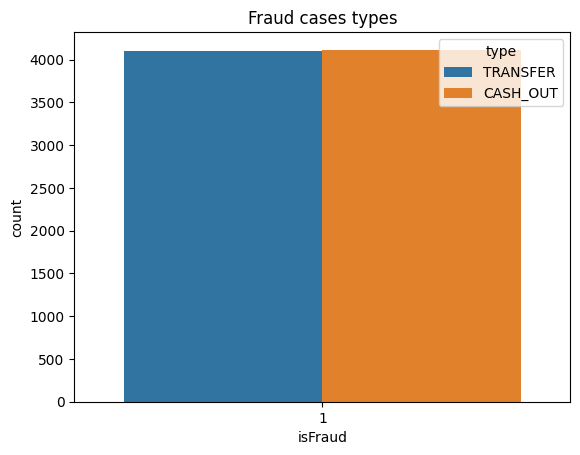

In [15]:
sns.countplot(x='isFraud', hue='type', data=df.loc[ df['isFraud'] == 1 ]).set(
    title='Fraud cases types')

# There are only 2 types of actual fraud cases (Transfer & Cash out)

[Text(0.5, 1.0, 'Non-alerted vs Alerted fraud cases comparison')]

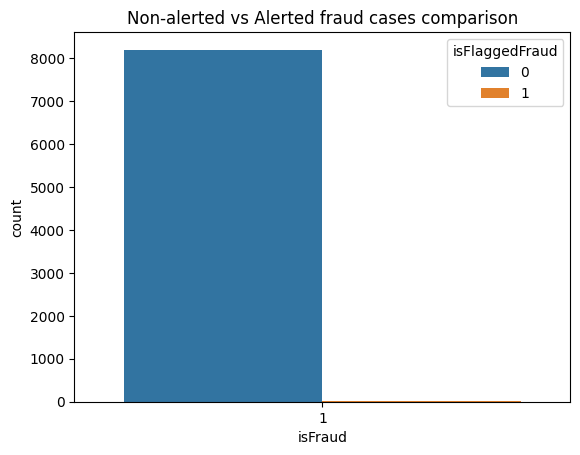

In [16]:
sns.countplot(x='isFraud', hue='isFlaggedFraud', data=df.loc[ df['isFraud'] == 1 ]
             ).set(title='Non-alerted vs Alerted fraud cases comparison')


# There are only few actual fraud cases that have been alarmed and detection has 
# missed out many actual fraudulent cases.

<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Data Preparation and Transformation</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [17]:

#trasform the categorical variables to a format that our Linear Regression model will understand

type1 = LabelEncoder()
nameOrig1 = LabelEncoder()
nameDest1 = LabelEncoder()

df['type_n'] = type1.fit_transform(df['type'])
df['nameOrig_n'] = nameOrig1.fit_transform(df['nameOrig'])
df['nameDest_n'] = nameDest1.fit_transform(df['nameDest'])
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_n,nameOrig_n,nameDest_n
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3,757869,1662094
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3,2188998,1733924
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4,1002156,439685
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,5828262,391696
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3,3445981,828919


In [18]:
df = df.drop(['type', 'nameOrig', 'nameDest'], axis='columns')
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_n,nameOrig_n,nameDest_n
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,757869,1662094
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,2188998,1733924
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,1002156,439685
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,5828262,391696
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,3445981,828919


<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Building the model</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [19]:
#Feature selection and logistic regression modeling

# In my case, all features are selected except for 'isFlaggedFraud' column which is not a feature for my model
# It was observed that all 9 features are necessary to get the optimal model. 
# Model Performance will drop as the features are excluded one by one.
# I have applied Quantile Transformation as a preprocessing step using Gaussian distribution
# I have chosen Recursive Feature Elimination RFE as feature elimination algorithm which
# fits the model and removes the weakest features until specified number is reached.
# Obviously, I have used all 9 features since there are not many attributes in my dataset.



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

feature_cols = ['step', 'type_n', 'amount', 'nameOrig_n','oldbalanceOrg','newbalanceOrig',
                'nameDest_n','oldbalanceDest','newbalanceDest']

#feature_cols = ['step', 'type_n', 'amount']
X = df[feature_cols] # Features
y = df.isFraud


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipe = make_pipeline(QuantileTransformer(output_distribution="normal", n_quantiles=100, random_state=0), 
                     LogisticRegression(solver='lbfgs', max_iter=500, random_state=0))
rfe = RFE(pipe, n_features_to_select=9, step=1)
fit = rfe.fit(X_train, y_train)

print("Done...")



Done...


In [20]:

y_pred = rfe.predict(X_test)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# All 9 features were selected for the built model

Num Features: 9
Selected Features: [ True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1]


<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Evaluation of model performance</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [21]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#  [[TN,     FP],
#  [   FN,    TP]]
#
# The model correctly guesses 1906325 negative cases and 1144 actual fraud cases.
# However, the model has some inaccuracies, there are 26 false positive which 
# predicted +ve, but actual -ve and 1291 cases of false negative which missed 
# the actual +ve cases.
# the model will be further analysed with more metrics


array([[1906325,      26],
       [   1291,    1144]])

Text(0.5, 427.9555555555555, 'Predicted label')

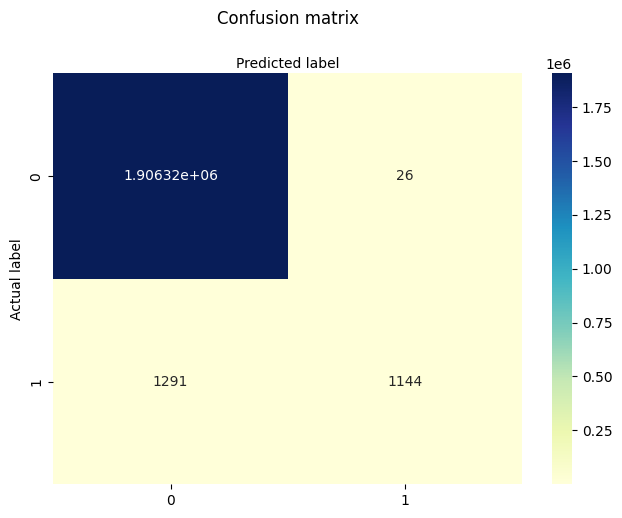

In [22]:

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#y_pred = rfe.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#cm_display = ConfusionMatrixDisplay(cm).plot()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=1))


print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))

print('AUC_pred  ={:.5f}'.format(roc_auc_score(y_test, rfe.predict(X_test))))

#y_pred = rfe.predict(X_test)
#auc = roc_auc_score(y_test, rfe.predict_proba(X_test)[:,1])
fpr, tpr, _ = metrics.roc_curve(y_test, rfe.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
print('AUC  ={:.5f}'.format(auc))




# The model has 99.931% accuracy with 0.97778 precision due to vast amount of data points.
# And F1 score is rated at 0.63467.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.47      0.63      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.73      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy = 0.99931
Precision = 0.97778
Recall = 0.46982
F1 score = 0.63467
AUC_pred  =0.73490
AUC  =0.98447


<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font><br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font><br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Building another model with Support Vector Classification</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [25]:
#Feature selection and support vector classification SVC modeling

# I have used another classification technique apart from Logistic Regression technique
# I have set higher bandwidth of cache size RAM, Polynomial over rbf kernel to handle the algo effectively.
# I have applied the same Quantile Transformation as a preprocessing step using Gaussian distribution
# I have chosen Recursive Feature Elimination RFE as feature elimination algorithm which
# fits the model and removes the weakest features until specified number is reached.
# Obviously, I have used all 9 features since there are not many attributes in my dataset.
###################
###################
# Most importantly, it was observed that SVC algo runs significantly slower than Log Regression.
###################
###################

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

feature_cols = ['step', 'type_n', 'amount', 'nameOrig_n','oldbalanceOrg','newbalanceOrig',
                'nameDest_n','oldbalanceDest','newbalanceDest']

#feature_cols = ['step', 'type_n', 'amount']
X = df[feature_cols] # Features
y = df.isFraud


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipe = make_pipeline(QuantileTransformer(output_distribution="normal", n_quantiles=100, random_state=0), 
                     SVC(kernel='poly', cache_size=2000, random_state=0))
rfe = RFE(pipe, n_features_to_select=9, step=1)
fit = rfe.fit(X_train, y_train)

print("Done...")


y_pred = rfe.predict(X_test)


print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# All 9 features were selected for the built model


Done...
Num Features: 9
Selected Features: [ True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1]


<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Evaluation of SVC model performance</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

In [26]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#  [[TN,     FP],
#  [   FN,    TP]]
#
# The model correctly guesses 1906335 negative cases and 1541 actual fraud cases.
# However, the model has some inaccuracies, there are 16 false positive which 
# predicted +ve, but actual -ve and 894 cases of false negative which missed 
# the actual +ve cases.
# the model will be further analysed with more metrics

array([[1906335,      16],
       [    894,    1541]])

Text(0.5, 427.9555555555555, 'Predicted label')

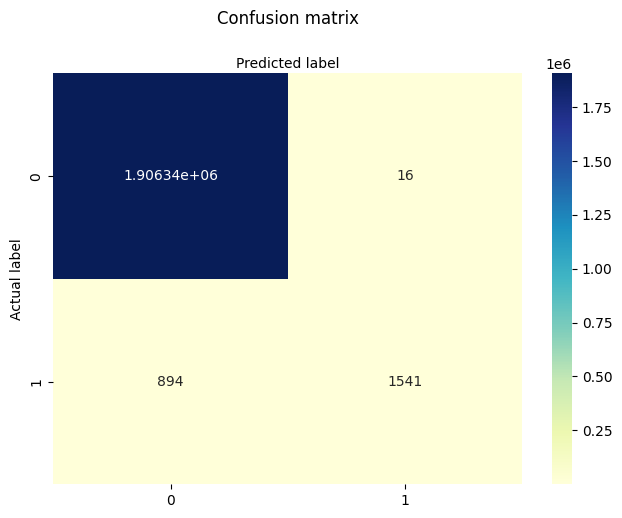

In [27]:

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
#y_pred = rfe.predict(X_test)
#cm = confusion_matrix(y_test, y_pred)
#cm_display = ConfusionMatrixDisplay(cm).plot()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [28]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=1))


print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))


#y_pred = rfe.predict(X_test)
#auc = roc_auc_score(y_test, rfe.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, rfe.predict(X_test))
print('AUC_pred  ={:.5f}'.format(auc))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.99      0.63      0.77      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.82      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy = 0.99952
Precision = 0.98972
Recall = 0.63285
F1 score = 0.77204
AUC_pred  =0.81642


<br/>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<font style="color:green;font-size:20px">Conclusion of model selection</font>
<br/>
<font style="color:#8B8000;font-size:20px"><b>----------------------------------------</b></font>
<br/>
<br/>
<br/>

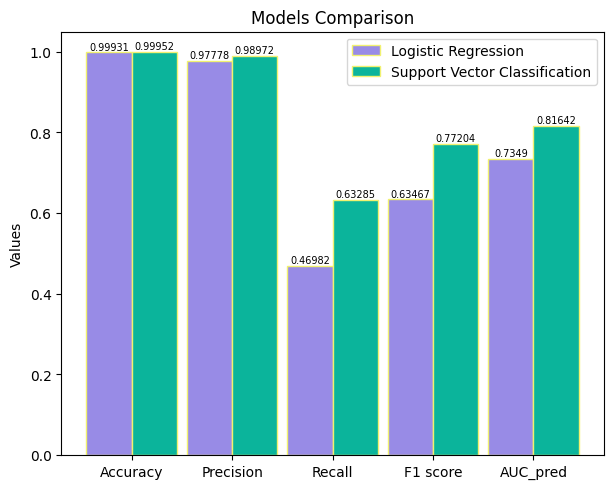

In [29]:
# Models metrics comparison

LogR = [0.99931, 0.97778, 0.46982, 0.63467, 0.73490]
SVC = [0.99952, 0.98972, 0.63285, 0.77204, 0.81642]
index=['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC_pred']
df = pd.DataFrame({'Logistic Regression': LogR,
                   'Support Vector Classification': SVC}, index=index)
ax = df.plot.bar(rot=0, width= 0.9, edgecolor='#F1F170', color=['#988BE6','#0BB49B'], figsize=(7,5.5))
ax.set_title("Models Comparison")
ax.set_ylabel("Values")
for label in ax.containers:
    ax.bar_label(label, label_type='edge', fontsize=7)
plt.show()

<br/>
<font style="color:green;font-size:20px">In summary, it is concluded that SVC performs better than Logistic Regression model with F1 score at 0.77204 and 0.63467 respectively. However, SVC takes longer time and consumes more CPU computing power and larger memory space. In term of speed, Logistic Regression performs relatively fine with a difference of 397 more missed real fraud cases when compared with SVC.</font>